In [60]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

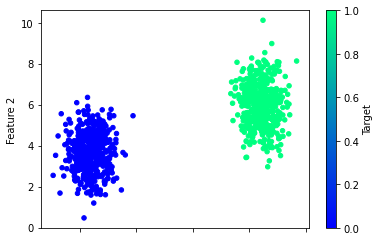

In [61]:
# generate dummy dataset
X, y  = make_blobs(n_samples = 1000, centers = 2, n_features = 2, random_state = 78)

# create a dataframe with the dummy data
df = pd.DataFrame(X, columns = ["Feature 1", "Feature 2"])
df["Target"] = y

df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap = "winter")

In [62]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [63]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [64]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [65]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

In [66]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [67]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5035 - accuracy: 0.5453
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.6147
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4512 - accuracy: 0.6947
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4292 - accuracy: 0.7613
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4096 - accuracy: 0.8387
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.9107
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.9413
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3573 - accuracy: 0.9573
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3396 - accuracy: 0.9667
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3213 - accuracy: 0.9720
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0056 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0044 - accuracy: 1.0000


<AxesSubplot:>

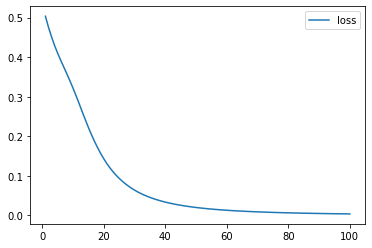

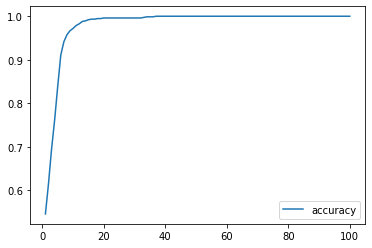

In [70]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [71]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0032 - accuracy: 1.0000 - 87ms/epoch - 11ms/step
Loss: 0.003188122995197773, Accuracy: 1.0


In [72]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

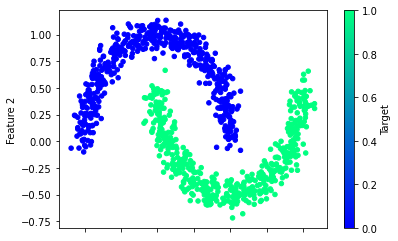

In [73]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [87]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.4656 - accuracy: 0.5053
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0882 - accuracy: 0.5560
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8597 - accuracy: 0.6080
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.6640
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.7000
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7320
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.7627
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7813
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.7987
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8147
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2139 - accuracy: 0.9080
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2133 - accuracy: 0.9107
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2129 - accuracy: 0.9080
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2119 - accuracy: 0.9093
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2112 - accuracy: 0.9107
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.9107
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9120
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2089 - accuracy: 0.9120
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2082 - accuracy: 0.9120
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2071 - accuracy: 0.9120
Epoch 93/100


<AxesSubplot:>

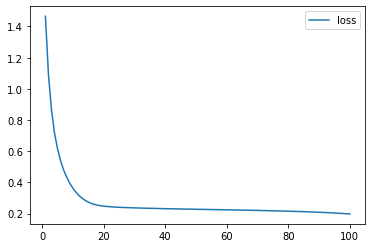

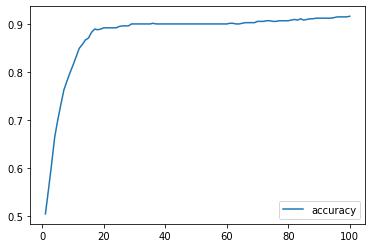

In [76]:
# Create a DataFrame containing training history
moon_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
moon_df.plot(y="loss")
# Plot the accuracy
moon_df.plot(y="accuracy")

<AxesSubplot:>

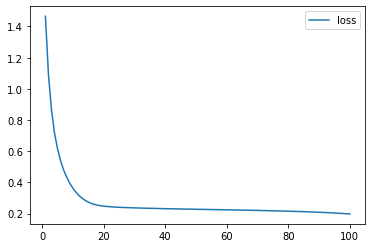

In [77]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

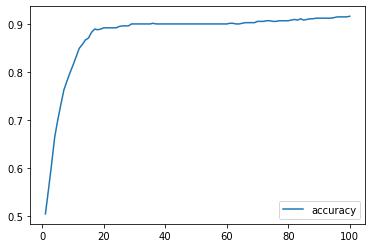

In [78]:
# Plot the accuracy
history_df.plot(y="accuracy")


In [79]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [80]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [81]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8436 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7925 - accuracy: 0.4693
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7467 - accuracy: 0.4653
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7075 - accuracy: 0.4520
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6730 - accuracy: 0.4413
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.4720
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6158 - accuracy: 0.5147
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.5547
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.5720
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.5907
Epoch 11/

Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.9067
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2766 - accuracy: 0.9067
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.9053
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2731 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2719 - accuracy: 0.9053
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9053
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2697 - accuracy: 0.9040
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9040
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2674 - accuracy: 0.9040


In [82]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
ramen_df

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


<AxesSubplot:ylabel='Density'>

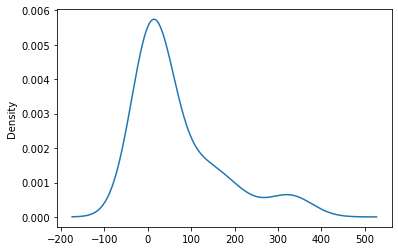

In [83]:
# Visualize the value counts
country_counts.plot.density()

In [88]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()


Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [85]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))
encode_df
# # Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df

,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\walte\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [89]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("Resources/hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [90]:
scaler = StandardScaler()

In [91]:
scaler.fit(hr_df)

StandardScaler()

In [96]:
# Scale the data
scaled_data = scaler.transform(hr_df)
transformed_scaled_data = pd.DataFrame(scaled_data, columns = hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
